In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

# Load Data

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocynanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Separate Features and Labels

In [3]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

C:\Users\ChiaWei\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [4]:
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

# Run PCA

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Comparison Plot

In [10]:
def plot_clustering(clusters, clustering_method_name):
    print(clustering_method_name)
    print()
    
    fig, ax = plt.subplots(figsize=(10, 6))

    for x, true_label, cluster_label in zip(X_pca, y, clusters):

        marker = {
            1:'o',
            2:'+',
            3:'^'
        }[true_label]

        color = {
            0:'red',
            1:'green',
            2:'purple'
        }[cluster_label]

        ax.scatter(x[0], x[1], marker=marker, c=color, alpha=0.6, s=50)

    red_patch = mpatches.Patch(color='red', label='The red data')
    blue_patch = mpatches.Patch(color='blue', label='The blue data')

    ax.legend(handles=[
                mpatches.Patch(color='red', label='Cluster 0'),
                mpatches.Patch(color='green', label='Cluster 1'),
                mpatches.Patch(color='purple', label='Cluster 2'),
                Line2D([], [], marker='o', color='w', markeredgecolor='black', label='Label 1'),
                Line2D([], [], marker='+', color='w', markeredgecolor='black', label='Label 2'),
                Line2D([], [], marker='^', color='w', markeredgecolor='black', label='Label 3')
    ])

    ax.set_title(f'Total Variance {sum(pca.explained_variance_ratio_[:2]):.2%}')

    plt.show()

    display(pd.DataFrame(zip(y, clusters), columns=['true', 'clustering']) \
                    .groupby(['true', 'clustering']).size().unstack().fillna(0).astype(int))

K Means Clustering



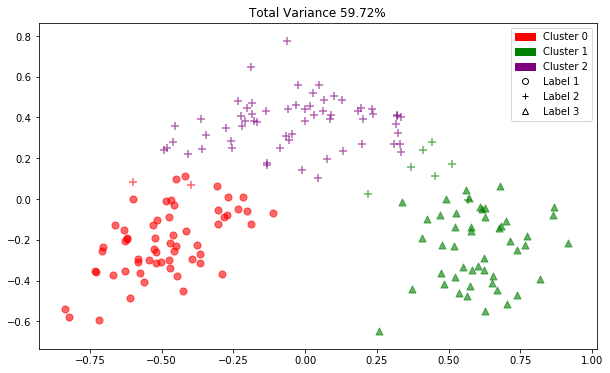

clustering,0,1,2
true,,,
1,59,0,0
2,2,7,62
3,0,48,0


In [11]:
plot_clustering(KMeans(n_clusters=3, random_state=0).fit(X_scaled).labels_,
                'K Means Clustering')

Hierachical Clustering



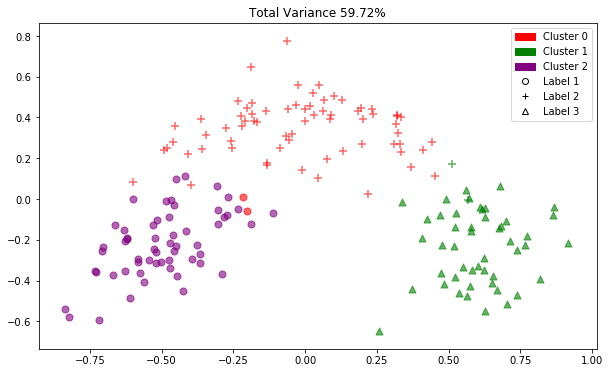

clustering,0,1,2
true,,,
1,2,0,57
2,69,2,0
3,0,48,0


In [12]:
plot_clustering(AgglomerativeClustering(n_clusters=3).fit(X_scaled).labels_,
                'Hierachical Clustering')